In [2]:
import requests
from dotenv import load_dotenv
import os 
import pandas as pd
import numpy as np
import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
import json
import matplotlib.pyplot as plt

In [3]:
load_dotenv()

True

In [4]:
alpaca_api_key = os.getenv("APCA_API_KEY")
alpaca_secret_key = os.getenv("APCA_API_SECRET")
# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version= "v2")

In [5]:
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpca Secret Key type: <class 'str'>


In [59]:
current_date = pd.Timestamp("2020-07-05", tz="America/New_York").isoformat()

tickers = ["SPCE", "CPRX", "BABA", "AMZN", "SNE","APHA", "GOOGL", "MSFT","NRZ","PLUG","PTON"]

timeframe = "1D"

In [60]:
df_ticker = alpaca.get_barset(
    tickers,
    timeframe,
    start=current_date
).df

df_ticker

AMZN                                          \
                              open       high        low    close   volume   
time                                                                         
2020-07-06 00:00:00-04:00  2934.97  3059.8800  2930.0000  3057.16  6493685   
2020-07-07 00:00:00-04:00  3058.55  3069.5500  2990.0000  3000.12  4875944   
2020-07-08 00:00:00-04:00  3022.61  3083.9700  3012.4302  3081.88  4687637   
2020-07-09 00:00:00-04:00  3115.99  3193.8800  3074.0017  3183.81  6101864   
2020-07-10 00:00:00-04:00  3191.76  3215.0000  3135.7000  3203.36  5135404   
...                            ...        ...        ...      ...      ...   
2020-12-29 00:00:00-05:00  3309.94  3350.6500  3281.2230  3320.71  4605698   
2020-12-30 00:00:00-05:00  3341.00  3342.1000  3282.4700  3285.85  2897643   
2020-12-31 00:00:00-05:00  3275.00  3282.9219  3241.2000  3256.41  2636124   
2021-01-04 00:00:00-05:00  3270.00  3272.0000  3144.0200  3186.65  3974073   
2021-01-05 00:00:00-05:00  3166.01  3223.3800  3165.0600  3218.51  2325459   

                             APHA                               ...     SNE  \
                             open  high    low  close   volume  ...    open   
time                                                            ...           
2020-07-06 00:00:00-04:00  4.3300  4.46  4.310  4.380  2929095  ...   70.52   
2020-07-07 00:00:00-04:00  4.3800  4.40  4.310  4.315  2254316  ...   69.82   
2020-07-08 00:00:00-04:00  4.3600  4.37  4.250  4.320  2464271  ...   69.55   
2020-07-09 00:00:00-04:00  4.3300  4.36  4.115  4.190  3236089  ...   71.32   
2020-07-10 00:00:00-04:00  4.1800  4.31  4.130  4.310  3704145  ...   73.00   
...                           ...   ...    ...    ...      ...  ...     ...   
2020-12-29 00:00:00-05:00  6.8721  7.03  6.650  6.805  5999540  ...  100.00   
2020-12-30 00:00:00-05:00  6.8300  7.19  6.813  7.055  6105187  ...   99.80   
2020-12-31 00:00:00-05:00  7.0724  7.09  6.890  6.925  5053260  ...  100.93   
2021-01-04 00:00:00-05:00  7.0100  7.43  7.000  7.295  9343928  ...  101.50   
2021-01-05 00:00:00-05:00  7.3700  7.61  7.260  7.490  7557911  ...  102.02   

                                                              SPCE         \
                             high      low   close   volume   open   high   
time                                                                        
2020-07-06 00:00:00-04:00   70.81   70.295   70.53  1288534  16.58  17.09   
2020-07-07 00:00:00-04:00   70.06   69.050   69.16   891597  16.63  16.84   
2020-07-08 00:00:00-04:00   69.85   68.980   69.79   517897  16.61  16.82   
2020-07-09 00:00:00-04:00   71.66   70.480   71.51   933853  17.10  19.49   
2020-07-10 00:00:00-04:00   74.11   72.615   73.95  1659237  19.32  19.98   
...                           ...      ...     ...      ...    ...    ...   
2020-12-29 00:00:00-05:00  100.83   99.350  100.43   844977  24.04  24.24   
2020-12-30 00:00:00-05:00  100.95   99.660  100.79   587897  23.89  24.38   
2020-12-31 00:00:00-05:00  101.40  100.610  101.12   644175  24.09  24.14   
2021-01-04 00:00:00-05:00  101.62   99.460  100.07   908748  23.96  23.97   
2021-01-05 00:00:00-05:00  103.52  102.000  103.09  1080194  23.08  24.48   

                                                        
                               low   close      volume  
time                                                    
2020-07-06 00:00:00-04:00  16.0500  16.940  13633640.0  
2020-07-07 00:00:00-04:00  16.1512  16.550   7866268.0  
2020-07-08 00:00:00-04:00  16.2000  16.800   8493290.0  
2020-07-09 00:00:00-04:00  17.0800  19.460  49919767.0  
2020-07-10 00:00:00-04:00  18.2700  19.240  26817783.0  
...                            ...     ...         ...  
2020-12-29 00:00:00-05:00  23.0100  23.740   9106372.0  
2020-12-30 00:00:00-05:00  23.6500  24.020   6137255.0  
2020-12-31 00:00:00-05:00  23.2501  23.700   5515423.0  
2021-01-04 00:00:00-05:00  22.8800  23.220   7413269.0  
2021-01-05

In [61]:
df_closing_prices = pd.DataFrame()

for ticker in tickers:
    df_closing_prices[ticker] = df_ticker[ticker]["close"]
# Preview DataFrame
# YOUR CODE HERE!
df_closing_prices

SPCE   CPRX      BABA     AMZN     SNE   APHA  \
time                                                                         
2020-07-06 00:00:00-04:00  16.940  4.890  240.0000  3057.16   70.53  4.380   
2020-07-07 00:00:00-04:00  16.550  5.010  236.5000  3000.12   69.16  4.315   
2020-07-08 00:00:00-04:00  16.800  5.080  257.6200  3081.88   69.79  4.320   
2020-07-09 00:00:00-04:00  19.460  5.020  261.4400  3183.81   71.51  4.190   
2020-07-10 00:00:00-04:00  19.240  4.950  260.9900  3203.36   73.95  4.310   
...                           ...    ...       ...      ...     ...    ...   
2020-12-29 00:00:00-05:00  23.740  3.375  236.4598  3320.71  100.43  6.805   
2020-12-30 00:00:00-05:00  24.020  3.420  238.4700  3285.85  100.79  7.055   
2020-12-31 00:00:00-05:00  23.700  3.340  232.6300  3256.41  101.12  6.925   
2021-01-04 00:00:00-05:00  23.220  3.525  227.8700  3186.65  100.07  7.295   
2021-01-05 00:00:00-05:00  24.106  3.510  240.4800  3218.51  103.09  7.490   

                              GOOGL    MSFT   NRZ    PLUG    PTON  
time                                                               
2020-07-06 00:00:00-04:00  1499.660  210.69  7.20   9.975   60.54  
2020-07-07 00:00:00-04:00  1489.920  208.24  6.80   9.335   60.65  
2020-07-08 00:00:00-04:00  1503.155  212.84  6.83   9.500   62.50  
2020-07-09 00:00:00-04:00  1518.380  214.40  6.50   8.950   64.46  
2020-07-10 00:00:00-04:00  1538.810  213.65  6.83   9.290   68.49  
...                             ...     ...   ...     ...     ...  
2020-12-29 00:00:00-05:00  1757.780  224.29  9.95  32.450  150.03  
2020-12-30 00:00:00-05:00  1736.240  221.68  9.81  34.210  154.96  
2020-12-31 00:00:00-05:00  1751.170  222.37  9.95  33.920  151.84  
2021-01-04 00:00:00-05:00  1726.390  217.81  9.47  32.180  145.96  
2021-01-05 00:00:00-05:00  1739.260  218.01  9.46  32.550  148.44  

[128 rows x 11 columns]

In [9]:
df_closing_prices.index = df_closing_prices.index.date

In [10]:
df_closing_prices

FB    AAPL     AMZN    NFLX    GOOGL     TSLA     SPY     GLD  \
2018-12-17  140.29  163.97  1519.75  262.96  1025.89  348.290  255.10  117.85   
2018-12-18  143.67  165.87  1551.11  270.96  1043.32  336.830  255.12  118.13   
2018-12-19  133.35  160.76  1494.83  266.68  1034.66  332.980  251.19  117.42   
2018-12-20  133.46  156.84  1460.83  260.58  1023.75  315.315  247.25  119.21   
2018-12-21  124.95  150.85  1376.73  246.20   990.27  319.910  240.73  118.74   
...            ...     ...      ...     ...      ...      ...     ...     ...   
2020-12-29  276.78  134.93  3320.71  530.87  1757.78  665.980  371.48  176.33   
2020-12-30  271.88  133.72  3285.85  524.61  1736.24  694.710  371.93  177.69   
2020-12-31  273.20  132.58  3256.41  540.71  1751.17  705.210  373.85  178.37   
2021-01-04  268.94  129.41  3186.65  522.67  1726.39  729.750  368.85  182.31   
2021-01-05  270.97  130.95  3218.51  520.78  1739.26  735.055  371.32  182.87   

               VWO     BAC       KO  
2018-12-17  38.290  24.470  48.3200  
2018-12-18  38.525  24.475  48.3150  
2018-12-19  37.890  24.175  47.8900  
2018-12-20  38.200  24.090  47.5300  
2018-12-21  37.860  23.360  47.5700  
...            ...     ...      ...  
2020-12-29  49.555  30.000  54.1400  
2020-12-30  50.220  29.990  54.4500  
2020-12-31  50.130  30.300  54.8200  
2021-01-04  50.350  30.040  52.7600  
2021-01-05  51.500  30.270  52.1799  

[517 rows x 11 columns]

In [11]:
df_current_price = df_closing_prices.tail(1)
df_current_price

FB    AAPL     AMZN    NFLX    GOOGL     TSLA     SPY     GLD  \
2021-01-05  270.97  130.95  3218.51  520.78  1739.26  735.055  371.32  182.87   

             VWO    BAC       KO  
2021-01-05  51.5  30.27  52.1799

In [64]:
price_change_df = df_closing_prices.pct_change()

In [65]:
daily_std = price_change_df.std()
daily_std

SPCE     0.055607
CPRX     0.035349
BABA     0.027379
AMZN     0.022978
SNE      0.016133
APHA     0.046381
GOOGL    0.017558
MSFT     0.019149
NRZ      0.028450
PLUG     0.056484
PTON     0.045515
dtype: float64

In [68]:
annual_std = daily_std * np.sqrt(252)
annual_std

SPCE     0.882741
CPRX     0.561142
BABA     0.434635
AMZN     0.364771
SNE      0.256104
APHA     0.736281
GOOGL    0.278717
MSFT     0.303974
NRZ      0.451634
PLUG     0.896658
PTON     0.722530
dtype: float64

In [71]:
standard_df = pd.DataFrame(annual_std, columns=["Standard Dev"])
standard_df

Standard Dev
SPCE       0.882741
CPRX       0.561142
BABA       0.434635
AMZN       0.364771
SNE        0.256104
APHA       0.736281
GOOGL      0.278717
MSFT       0.303974
NRZ        0.451634
PLUG       0.896658
PTON       0.722530

In [13]:
corr_matrix = df_closing_prices.pct_change().apply(lambda x: np.log(1+x)).corr()
corr_matrix

FB      AAPL      AMZN      NFLX     GOOGL      TSLA       SPY  \
FB     1.000000  0.268347  0.679044  0.544150  0.750527  0.215012  0.708214   
AAPL   0.268347  1.000000  0.233466  0.184108  0.288179  0.859738  0.314281   
AMZN   0.679044  0.233466  1.000000  0.652006  0.667410  0.221878  0.627800   
NFLX   0.544150  0.184108  0.652006  1.000000  0.523526  0.207805  0.498444   
GOOGL  0.750527  0.288179  0.667410  0.523526  1.000000  0.251511  0.811383   
TSLA   0.215012  0.859738  0.221878  0.207805  0.251511  1.000000  0.274170   
SPY    0.708214  0.314281  0.627800  0.498444  0.811383  0.274170  1.000000   
GLD    0.081934  0.019092  0.095991  0.095704  0.043947  0.057633  0.065100   
VWO    0.601576  0.313009  0.556565  0.445113  0.690217  0.317307  0.847398   
BAC    0.467803  0.239202  0.333429  0.251376  0.574936  0.216329  0.809472   
KO     0.361235  0.189996  0.288774  0.184753  0.513710  0.158638  0.714402   

            GLD       VWO       BAC        KO  
FB     0.081934  0.601576  0.467803  0.361235  
AAPL   0.019092  0.313009  0.239202  0.189996  
AMZN   0.095991  0.556565  0.333429  0.288774  
NFLX   0.095704  0.445113  0.251376  0.184753  
GOOGL  0.043947  0.690217  0.574936  0.513710  
TSLA   0.057633  0.317307  0.216329  0.158638  
SPY    0.065100  0.847398  0.809472  0.714402  
GLD    1.000000  0.117129 -0.110967  0.085812  
VWO    0.117129  1.000000  0.690911  0.561321  
BAC   -0.110967  0.690911  1.000000  0.606514  
KO     0.085812  0.561321  0.606514  1.000000

Expected Portfolio Returns

But first, lets take a look at the volatiltilty and returns of individual assets for a better understanding.

Volatility is given by the annual standard deviation. We multiply by 250 because there are 250 trading days/year.

In [17]:
#Volatility
ann_sd = df_closing_prices.pct_change().apply(lambda x: np.log(1+x)).std().apply(lambda x: x*np.sqrt(250))
ann_sd

FB       0.388525
AAPL     1.017376
AMZN     0.325905
NFLX     0.415034
GOOGL    0.319808
TSLA     1.263750
SPY      0.259643
GLD      0.159495
VWO      0.254012
BAC      0.442861
KO       0.271704
dtype: float64

In [18]:
# Creating a table for visualising returns and volatility of assets
assets = pd.concat([ind_er, ann_sd], axis=1) 
assets.columns = ['Returns', 'Volatility']
assets

Returns  Volatility
FB     0.397572    0.388525
AAPL   0.262241    1.017376
AMZN   0.420266    0.325905
NFLX   0.420579    0.415034
GOOGL  0.309321    0.319808
TSLA   0.975029    1.263750
SPY    0.217171    0.259643
GLD    0.227448    0.159495
VWO    0.176959    0.254012
BAC    0.202580    0.442861
KO     0.074490    0.271704

In [19]:
p_ret = [] # Define an empty array for portfolio returns
p_vol = [] # Define an empty array for portfolio volatility
p_weights = [] # Define an empty array for asset weights

num_assets = len(df_closing_prices.columns)
num_portfolios = 10000

In [20]:
for portfolio in range(num_portfolios):
    weights = np.random.random(num_assets)
    weights = weights/np.sum(weights)
    p_weights.append(weights)
    returns = np.dot(weights, ind_er) 
    # Returns are the product of individual expected returns of asset and its        # weights 
    p_ret.append(returns)
    var = cov_matrix.mul(weights, axis=0).mul(weights, axis=1).sum().sum()
    # Portfolio Variance
    sd = np.sqrt(var) 
    # Daily standard deviation
    ann_sd = sd*np.sqrt(250) 
    # Annual standard deviation = volatility
    p_vol.append(ann_sd)

In [21]:
data = {'Returns':p_ret, 'Volatility':p_vol}

for counter, symbol in enumerate(df_closing_prices.columns.tolist()):
    #print(counter, symbol)
    data[symbol+' weight'] = [w[counter] for w in p_weights]

In [22]:
# Dataframe of the 10000 portfolios created
portfolios  = pd.DataFrame(data)
portfolios.head() 

Returns  Volatility  FB weight  AAPL weight  AMZN weight  NFLX weight  \
0  0.320186    0.334039   0.129790     0.126586     0.033557     0.112024   
1  0.413650    0.433510   0.143517     0.145680     0.069795     0.088635   
2  0.307300    0.293884   0.139907     0.107891     0.090817     0.100090   
3  0.398987    0.389281   0.123427     0.093104     0.152266     0.092923   
4  0.316032    0.274153   0.088283     0.034803     0.085511     0.190962   

   GOOGL weight  TSLA weight  SPY weight  GLD weight  VWO weight  BAC weight  \
0      0.139705     0.059763    0.021995    0.047494    0.132417    0.148532   
1      0.067723     0.173458    0.004704    0.121447    0.067966    0.096104   
2      0.089562     0.032796    0.143335    0.080052    0.057120    0.095203   
3      0.022478     0.162040    0.091489    0.033193    0.045349    0.065187   
4      0.097199     0.037109    0.089235    0.053575    0.164893    0.130850   

   KO weight  
0   0.048137  
1   0.020969  
2   0.063225  
3   0.118544  
4   0.027580

<AxesSubplot:xlabel='Volatility', ylabel='Returns'>

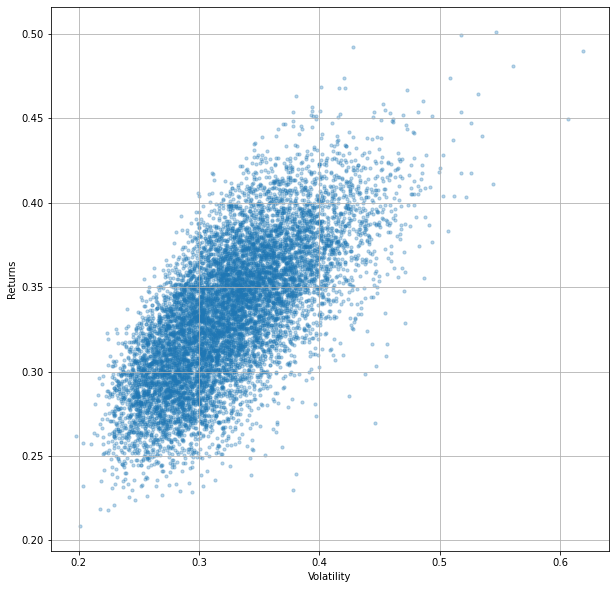

In [23]:
portfolios.plot.scatter(x='Volatility', y='Returns', marker='o', s=10, alpha=0.3, grid=True, figsize=[10,10])


In [26]:
min_vol_port = portfolios.iloc[portfolios['Volatility'].idxmin()]

# idxmin() gives us the minimum value in the column specified.                               
min_vol_port

Returns         0.261908
Volatility      0.197639
FB weight       0.005160
AAPL weight     0.006517
AMZN weight     0.216470
NFLX weight     0.055935
GOOGL weight    0.114178
TSLA weight     0.001890
SPY weight      0.073429
GLD weight      0.223522
VWO weight      0.117018
BAC weight      0.040178
KO weight       0.145704
Name: 8875, dtype: float64

The minimum volatility is the point plotted on the efficient frontier graph as shown:

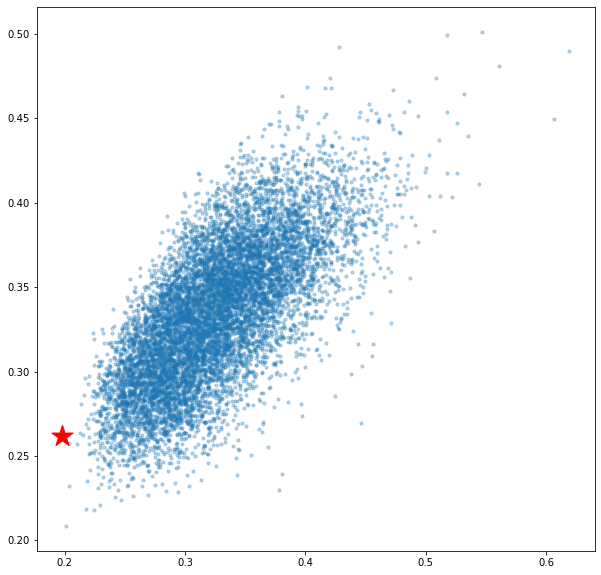

In [27]:
# plotting the minimum volatility portfolio
plt.subplots(figsize=[10,10])
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)

The red star denotes the most efficient portfolio with minimum volatility.

We found the portfolio with minimum volatility, but you will notice that the return on this portfolio is pretty low. Any sensible investor wants to maximize his return, even if it is a tradeoff with some level of risk.

The question arises that how do we find this optimal risky portfolio and finally optimize our portfolio to the maximum?

This is done by using a parameter called the Sharpe Ratio.

### Sharpe Ratio
The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.

The risk-free rate of return is the return on an investment with zero risk, meaning it’s the return investors could expect for taking no risk.

In [28]:
# Finding the optimal portfolio

rf = 0.01 # risk factor
optimal_risky_port = portfolios.iloc[((portfolios['Returns']-rf)/portfolios['Volatility']).idxmax()]
optimal_risky_port

Returns         0.322723
Volatility      0.223603
FB weight       0.034579
AAPL weight     0.014890
AMZN weight     0.223131
NFLX weight     0.111443
GOOGL weight    0.086880
TSLA weight     0.041123
SPY weight      0.095362
GLD weight      0.226124
VWO weight      0.088683
BAC weight      0.029873
KO weight       0.047912
Name: 5056, dtype: float64

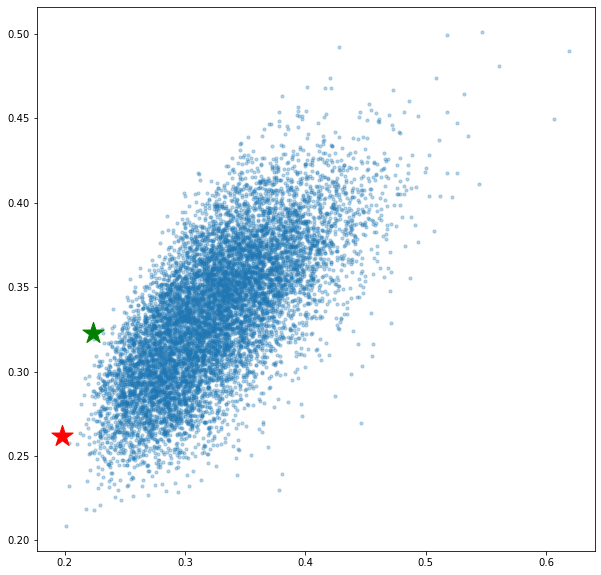

In [29]:
# Plotting optimal portfolio
# The green star represents the optimal risky portfolio.

plt.subplots(figsize=(10, 10))
plt.scatter(portfolios['Volatility'], portfolios['Returns'],marker='o', s=10, alpha=0.3)
plt.scatter(min_vol_port[1], min_vol_port[0], color='r', marker='*', s=500)
plt.scatter(optimal_risky_port[1], optimal_risky_port[0], color='g', marker='*', s=500)

In [30]:
# daily_changes = df_closing_prices.pct_change()
# daily_price_changes = daily_changes.dropna()
# daily_price_changes.head(1)

In [31]:
# returns = (1 + daily_price_changes).cumprod()

In [32]:
# new = returns.plot(figsize = (20,10), title="Portfolio Returns")
# new.set_ylabel("Percent change")

In [33]:
# weights = [.1,.1,.1,.1,.1,.05,.1,.1,.1,.05,1]

In [34]:
# weighted_returns = (weights * daily_price_changes)
# print(weighted_returns.head())

In [35]:
# port_ret = weighted_returns.sum(axis=1)

In [36]:
# cumulative_ret = (port_ret + 1).cumprod()

In [37]:
# fig = plt.figure(figsize=(20,10))
# ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
# ax1.plot(cumulative_ret)
# ax1.set_xlabel('Date')
# ax1.set_ylabel("Cumulative Returns")
# ax1.set_title("Portfolio Cumulative Returns")
# plt.show()

## Graph

### Our Portfolio axis is going up by percentages. Therefore, it went up to around 300% over the past five years. The Sharp decline was due to Covid outbreak back in March.

In [38]:
# print(tickers)

In [39]:
# daily_price_changes[["FB", "AMZN"]]

In [40]:
# fb_current_price = (df_current_price["FB"])
# aapl_current_price = (df_current_price["AAPL"])
# amzn_current_price = (df_current_price["AMZN"])
# nflx_current_price = (df_current_price["NFLX"])
# gogl_current_price = (df_current_price["GOOGL"])

In [41]:
# print(f"Current Faceboook closing prices: ${float(fb_current_price)}")
# print(f"Current Apple closing prices: ${float(aapl_current_price)}")
# print(f"Current Amazon closing prices: ${float(amzn_current_price)}")
# print(f"Current Netflix closing prices: ${float(nflx_current_price)}")
# print(f"Current Google closing prices: ${float(gogl_current_price)}")

In [42]:
current_changes = df_closing_prices.pct_change().dropna()

In [43]:

# FACE = float(input("ENTER WEIGHT OF Facebook"))
# APPLE = float(input("ENTER WEIGHT OF Apple"))
# AMAZON = float(input("ENTER WEIGHT OF Amazon"))
# NETFL = float(input("ENTER WEIGHT OF Netflix"))
# GOOGL= float(input("ENTER WEIGHT OF Google"))

# if FACE + APPLE + AMAZON + NETFL + GOOGL == 1:
#     portfolio_weights = [FACE, APPLE, AMAZON, NETFL, GOOGL]

#     portfolio_return = current_changes.dot(portfolio_weights)

#     portfolio_return.plot(figsize = (20, 10))

# else:
#     print("Adjust your inputs. Total weight must equal 1")

# portfolio_weights

In [44]:
# import os
# import requests
# import pandas as pd
# from dotenv import load_dotenv
# import alpaca_trade_api as tradeapi
# from MCForecastTools import MCSimulation
# import json

# %matplotlib inline

In [45]:
# load_dotenv()

In [46]:
# start_date = pd.Timestamp('2015-10-29', tz='America/New_York').isoformat()
# end_date = pd.Timestamp('2020-10-31', tz='America/New_York').isoformat()

In [47]:
# tickers

In [48]:


# df_stock_data = alpaca.get_barset(
#     tickers,
#     timeframe,
#     start=start_date,
#     end=end_date
# ).df
# # Display sample data
# df_stock_data.head()

In [49]:
# print(tickers)
# print(" ")
# print(len(tickers))

In [50]:
# portfolio_forecast = MCSimulation(
#     portfolio_data = df_stock_data,
#     weights = [.1,.1,.1,.1,.1,.05,.1,.1,.1,.05,1],
#     num_simulation = 100,
#     num_trading_days = 252*1
# )


In [51]:
# portfolio_forecast.portfolio_data.head()

In [52]:
# portfolio_forecast.calc_cumulative_return()

In [53]:
# line_plot = portfolio_forecast.plot_simulation()
# line_plot.set_ylabel("Cumulative Return")

In [54]:
# portfolio_forecast.summarize_cumulative_return()

In [55]:
# portfolio_forecast.plot_distribution()